In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
set_style("whitegrid")

In [56]:
# Select AAP data to do the time series prediction
data_aap = pd.read_csv("C:/Users/Ajay/Downloads/archive (12)/individual_stocks_5yr/individual_stocks_5yr/XRX_data.csv",
                        parse_dates=['date'])
data_aap.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,32.08,32.12,31.7000,31.84,1702218,XRX
1,2013-02-11,31.92,32.02,31.8000,31.96,1475369,XRX
2,2013-02-12,32.04,32.12,31.8000,31.84,1888523,XRX
3,2013-02-13,31.96,32.12,31.7600,32.00,2863447,XRX
4,2013-02-14,31.84,32.24,31.8004,32.12,1594884,XRX


In [57]:

# Get the number of rows and columns
rows, cols = data_aap.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1259
Number of columns: 7


In [58]:

# Split the data into train and test data by index slicing
# The test data is the last 120 indices
data_aap_test = data_aap.iloc[-120:].copy()
data_aap_train = data_aap.drop(data_aap_test.index).copy()

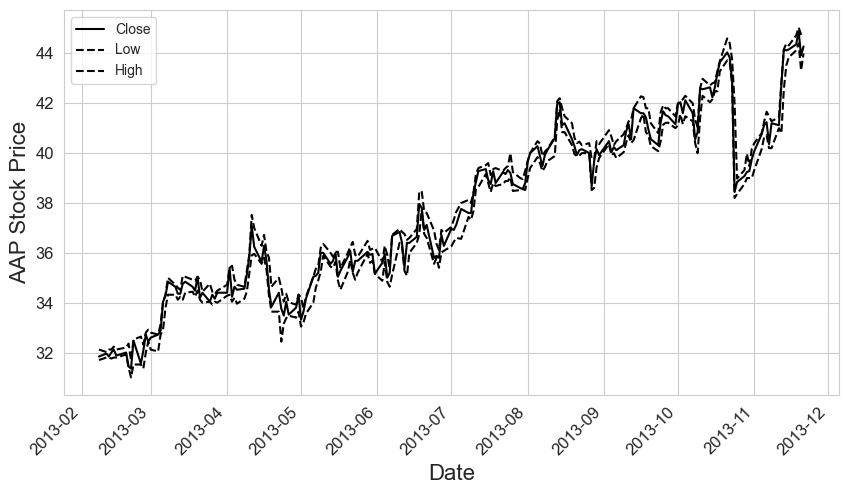

In [59]:
# Plot the first 200 observations of the training data to see the trend 

plt.figure(figsize=(10,5))

plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['close'].values[:200],
            'k-', label='Close')
plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['low'].values[:200],
            'k--', label='Low')
plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['high'].values[:200],
            'k--', label='High')

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("AAP Stock Price", fontsize=16)

plt.legend()

plt.show()

In [60]:
# Use Linear Regression to fit the close value against the dates. 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = np.arange(1, len(data_aap_train) + 1).reshape(-1, 1)
y = data_aap_train.close

X_test = np.arange(1, len(data_aap_test) + 1).reshape(-1, 1)
y_test = data_aap_test.close

reg.fit(X, y)

LinearRegression()

In [75]:
reg.predict(X_test)

array([47.24449651, 47.23434437, 47.22419223, 47.21404009, 47.20388795,
       47.1937358 , 47.18358366, 47.17343152, 47.16327938, 47.15312724,
       47.1429751 , 47.13282295, 47.12267081, 47.11251867, 47.10236653,
       47.09221439, 47.08206225, 47.07191011, 47.06175796, 47.05160582,
       47.04145368, 47.03130154, 47.0211494 , 47.01099726, 47.00084512,
       46.99069297, 46.98054083, 46.97038869, 46.96023655, 46.95008441,
       46.93993227, 46.92978013, 46.91962798, 46.90947584, 46.8993237 ,
       46.88917156, 46.87901942, 46.86886728, 46.85871513, 46.84856299,
       46.83841085, 46.82825871, 46.81810657, 46.80795443, 46.79780229,
       46.78765014, 46.777498  , 46.76734586, 46.75719372, 46.74704158,
       46.73688944, 46.7267373 , 46.71658515, 46.70643301, 46.69628087,
       46.68612873, 46.67597659, 46.66582445, 46.65567231, 46.64552016,
       46.63536802, 46.62521588, 46.61506374, 46.6049116 , 46.59475946,
       46.58460731, 46.57445517, 46.56430303, 46.55415089, 46.54

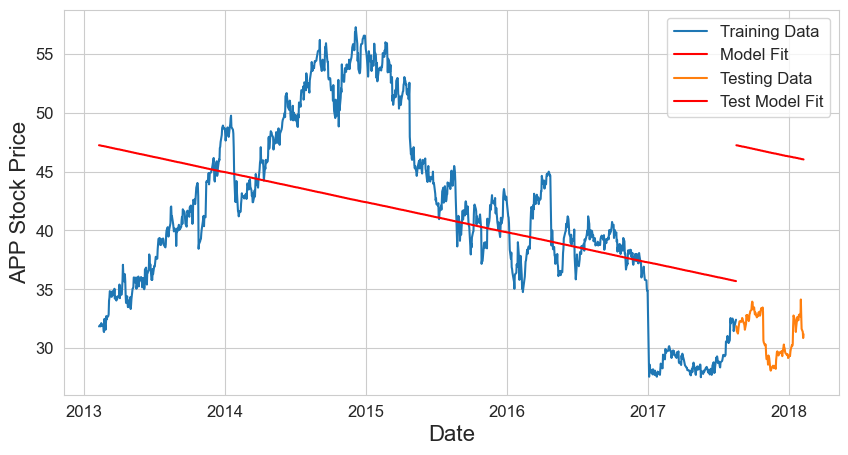

In [77]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date,
            data_aap_train.close,
            label="Training Data")

plt.plot(data_aap_train.date,
            reg.predict(X),
            "r",
            label="Model Fit")

plt.plot(data_aap_test.date,
            data_aap_test.close,
            label="Testing Data")

plt.plot(data_aap_test.date,
            reg.predict(X_test),
            "r",
            label="Test Model Fit")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("APP Stock Price", fontsize=16)

plt.show()

In [62]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(data_aap_train.close,
                      reg.predict(X))

48.24868362372241

In [63]:
beta_hat = (data_aap_train.close.values[-1] - data_aap_train.close.values[0])/len(data_aap_train)
sigma = np.sqrt(((data_aap_train.close.diff() - beta_hat)**2).sum()/len(data_aap_train))
drift_pred = data_aap_train.close.values[-1] + beta_hat*np.arange(1,len(data_aap_test) + 1)

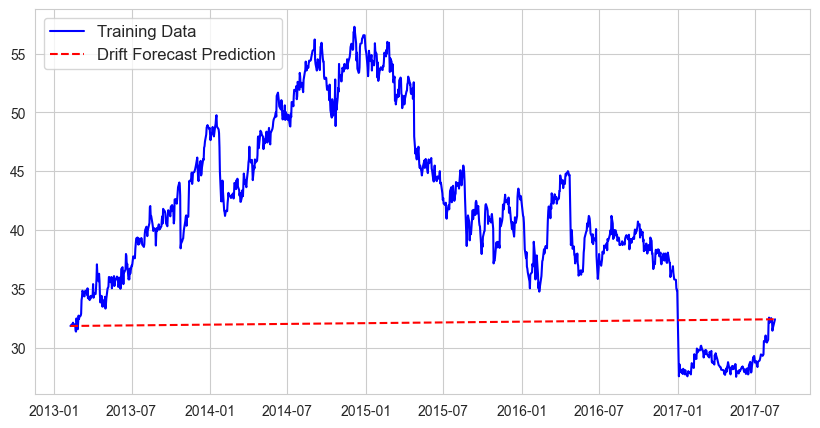

In [64]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date,
            data_aap_train.close,
            'b-',
            label="Training Data")

plt.plot(data_aap_train.date,
            data_aap_train.close.values[0] + beta_hat*data_aap_train.index,
            'r--',
            label="Drift Forecast Prediction")

plt.legend(fontsize=12, loc=2)

plt.show()

In [65]:
# MSE
from sklearn.metrics import mean_squared_error

mse_drift =mean_squared_error(data_aap_train.close,
                      data_aap_train.close.values[0] + beta_hat*data_aap_train.index)
print(f"Mean sq error using drift : {mse_drift}")

Mean sq error using drift : 147.81171233935166


In [66]:
# Building the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100


c:\Users\Ajay\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 696.2009 - val_loss: 759.1358
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 611.7277 - val_loss: 725.1436
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 593.3718 - val_loss: 715.8571
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 586.6484 - val_loss: 680.2797
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 561.0476 - val_loss: 653.0602
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 560.9678 - val_loss: 611.8005
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 524.0221 - val_loss: 575.6307
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 496.7220 - val_loss: 536.5240
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 473.7927 - val_loss: 558.1569
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 504.9210 - val_loss: 474.9568
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 462.5226 - val_loss: 440.3365
Epoch 12/

In [67]:
# Evaluate the model on the validation set
val_loss = model.evaluate(X_test, y_test)

# Make predictions on the validation set
predictions = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8051
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


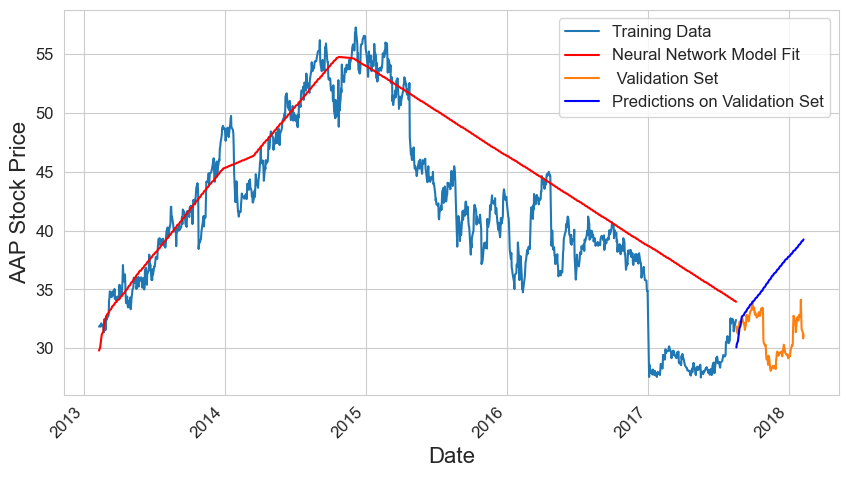

In [74]:
# Plot the training data, model fit, and predictions
plt.figure(figsize=(10, 5))
plt.plot(data_aap_train.date, data_aap_train.close, label="Training Data")
plt.plot(data_aap_train.date, model.predict(data_aap_train.index), "r", label="Neural Network Model Fit")
plt.plot(data_aap_test.date, data_aap_test.close, label=" Validation Set")
plt.plot(data_aap_test.date, predictions, "b", label="Predictions on Validation Set")
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=16)
plt.ylabel("AAP Stock Price", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [69]:
print(f'Mean Squared Error on validation set: {val_loss}')
print("Predictions on validation set:")
print(predictions)

Mean Squared Error on validation set: 30.796688079833984
Predictions on validation set:
[[30.072111]
 [30.34127 ]
 [30.61043 ]
 [30.879587]
 [31.148748]
 [31.417904]
 [31.687061]
 [31.957006]
 [32.22829 ]
 [32.49259 ]
 [32.65438 ]
 [32.731224]
 [32.808067]
 [32.884907]
 [32.961754]
 [33.038597]
 [33.11056 ]
 [33.179832]
 [33.249107]
 [33.31838 ]
 [33.387646]
 [33.45692 ]
 [33.52619 ]
 [33.595463]
 [33.65809 ]
 [33.71354 ]
 [33.768993]
 [33.82445 ]
 [33.8799  ]
 [33.935356]
 [33.99081 ]
 [34.04627 ]
 [34.10172 ]
 [34.157173]
 [34.212627]
 [34.26808 ]
 [34.323536]
 [34.37899 ]
 [34.43444 ]
 [34.489895]
 [34.545353]
 [34.600803]
 [34.656254]
 [34.711716]
 [34.767166]
 [34.82747 ]
 [34.89324 ]
 [34.959015]
 [35.024784]
 [35.090557]
 [35.156322]
 [35.222057]
 [35.287045]
 [35.352028]
 [35.41702 ]
 [35.48201 ]
 [35.546997]
 [35.611988]
 [35.676975]
 [35.741962]
 [35.806953]
 [35.87194 ]
 [35.93693 ]
 [36.001915]
 [36.066906]
 [36.131893]
 [36.196884]
 [36.261868]
 [36.326862]
 [36.39185 ]
 [